# ADM - HW2 - Instagram Profiles & Posts

## Libraries & Setup

In [1]:
import pandas as pd   # Data manipulation and analysis
import numpy as np    # Scientific Computing

import matplotlib.pyplot as plt   # Visualization
import matplotlib.lines as mlines   # Visualization

from tqdm import tqdm   # Progress bar

import functions

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
profiles_df = pd.read_csv(r'D:\Data\instagram_profiles.csv', delimiter='\t', converters={"profile_id": str})
locations_df = pd.read_csv(r'D:\Data\instagram_locations.csv', delimiter='\t', converters={"id": str})

In [4]:
posts_reader = functions.initialize_posts_reader()

# Research questions

## [RQ1] *Exploratory Data Analysis (EDA)*

In [4]:
profiles_df[:5]

,sid,profile_id,profile_name,firstname_lastname,description,following,followers,n_posts,url,cts,is_business_account
0,4184446,4721049632,jphillip033,John Pierce,"""Document Everything Always""",250.0,146.0,170.0,NaN,2019-08-01 14:38:55.394 -0400,False
1,4184457,590583002,mama_haas,Deanna,Trying to enjoy the simple things in life. Kni...,534.0,1145.0,2878.0,www.etsy.com/shop/MamaHaas69,2019-08-01 14:39:36.526 -0400,False
2,4184460,1074146658,yellowlightbreen,Eliza Gray,Maine is for Lovers,469.0,324.0,431.0,elizajanegray.com,2019-08-01 14:39:54.407 -0400,False
3,4184461,1472038842,tec1025,Thomas Clark,NaN,NaN,NaN,NaN,NaN,2019-08-01 14:40:06.472 -0400,NaN
4,4184462,3531420803,luckyfluff,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-01 14:40:07.806 -0400,NaN


In [5]:
locations_df[:5]

,sid,id,name,street,zip,city,region,cd,phone,aj_exact_city_match,...,dir_city_name,dir_city_slug,dir_country_id,dir_country_name,lat,lng,primary_alias_on_fb,slug,website,cts
0,719981,110296492939207,"Playa de Daimuz - Valencia, España",NaN,NaN,NaN,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,-0.139475,38.974391,daimuzplaya,playa-de-daimuz-valencia-espana,https://es.wikipedia.org/wiki/Daimuz,2019-05-29 01:21:29.987
1,719983,274391278,Nová Vieska,NaN,NaN,Nová Vieska,NaN,SK,NaN,True,...,Kis-Újfalu,kis-ujfalu,SK,Slovakia,18.466667,47.866667,NaN,nova-vieska,NaN,2019-05-29 01:21:38.037
2,719985,148885595789195,Everest Today,Himalayas,+977,"Kathmandu, Nepal",NaN,NP,NaN,False,...,Pasupati,pasupati,NP,Nepal,85.330150,27.701960,EverestToday,everest-today,NaN,2019-05-29 01:21:46.295
3,719987,263258277,BULAC - Bibliothèque universitaire des langues...,"65, rue des Grands-Moulins",75013,"Paris, France",NaN,FR,01 81 69 18 00,False,...,13ème Arrondissement Paris,13eme-arrondissement-paris,FR,France,2.375995,48.827240,BULAC.Paris,bulac-bibliotheque-universitaire-des-langues-e...,www.bulac.fr,2019-05-29 01:21:54.355
4,326443,406147529857708,ABC Cable Networks Group,3800 W Alameda Ave,91505,"Burbank, California",NaN,US,(818) 569-7500,False,...,NaN,NaN,NaN,NaN,-118.341864,34.153265,NaN,abc-cable-networks-group,NaN,2019-04-02 15:22:55.703


In [6]:
posts_reader.__next__()[:5]

,sid,sid_profile,post_id,profile_id,location_id,cts,post_type,description,numbr_likes,number_comments
0,28370919,3496776,BXdjjUlgcgq,2237947779,1022366247837915,2017-08-06 20:06:57.000,2,Wreckloose! Deevalley bike park laps on the @i...,80,0
1,28370932,-1,BVg0pbolYBC,5579335020,457426771112991,2017-06-19 09:31:16.000,1,🙌🏼 believe in ya dreams 🙌🏼 just like I believe...,25,1
2,28370933,-1,BRgkjcXFp3Q,313429634,457426771112991,2017-03-11 20:05:03.000,1,#meraviglia #incensi #the #candele #profumo #a...,9,0
3,28370934,-1,BKTKeNhjEA7,1837592700,457426771112991,2016-09-13 16:27:16.000,1,#teatime #scorpion #friends #love #mountains #...,4,0
4,28370935,-1,8-NQrvoYLX,1131527143,457426771112991,2015-10-18 10:19:27.000,1,thE sky gavE mE a #constEllation,8,0


## [RQ2] *Insights regarding profiles and posts*

## [RQ3] *Temporal analysis of publishing behavior*

In [8]:
posts_reader = functions.initialize_posts_reader()

In [9]:
posts_time = functions.retrieve_posts_time(posts_reader)

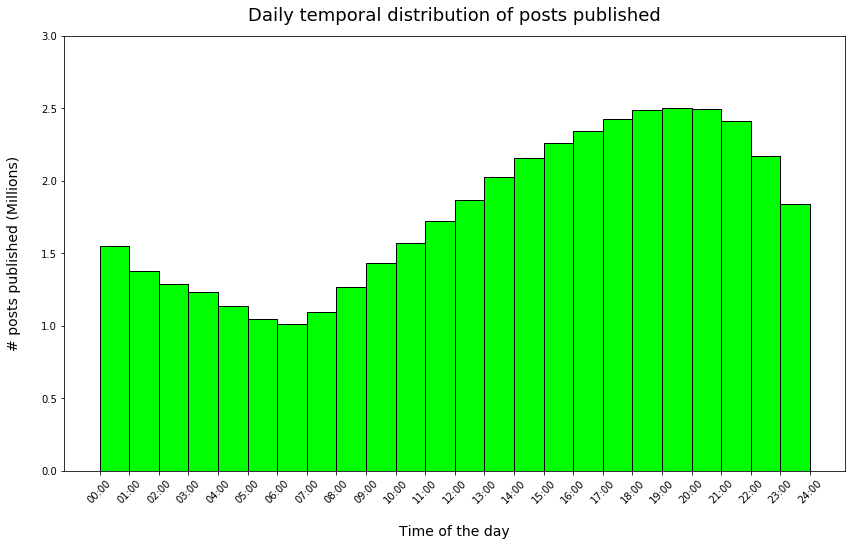

In [10]:
functions.plot_posts_time(posts_time)

In [11]:
time_intervals = [(6,11), (11,14), (14,17), (17,20), (20,24), (0,3), (3,6)]

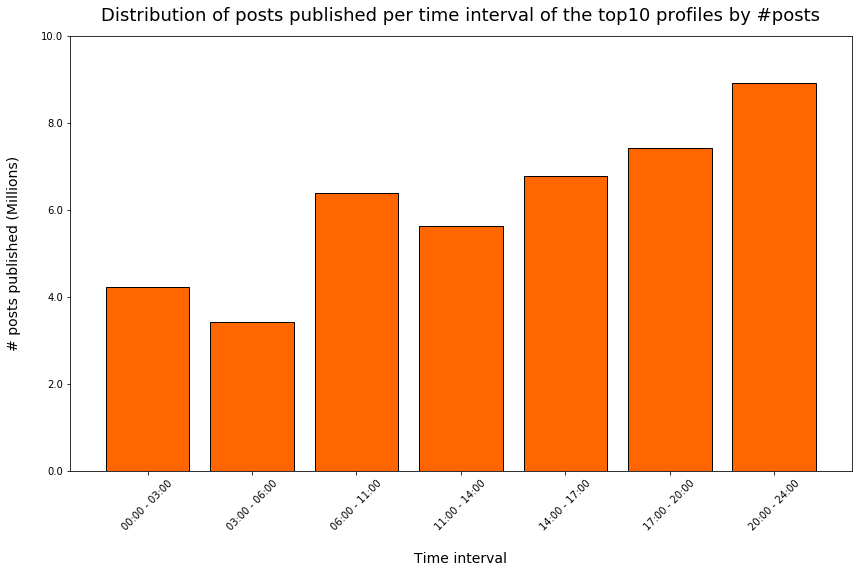

In [12]:
functions.plot_posts_time_custom(posts_time, time_intervals)

## [RQ4] *Enhancing our analysis (as permitted by dataset consistency)*

In [22]:
posts_reader = functions.initialize_posts_reader()

In [ ]:
profile_posts_map = functions.build_profile_posts_map(posts_reader)
posts = functions.posts_by_top_profile_ids(profile_posts_map,
                                           profiles_df[profiles_df["profile_id"]!=""].dropna(subset=["profile_id"]), 10)

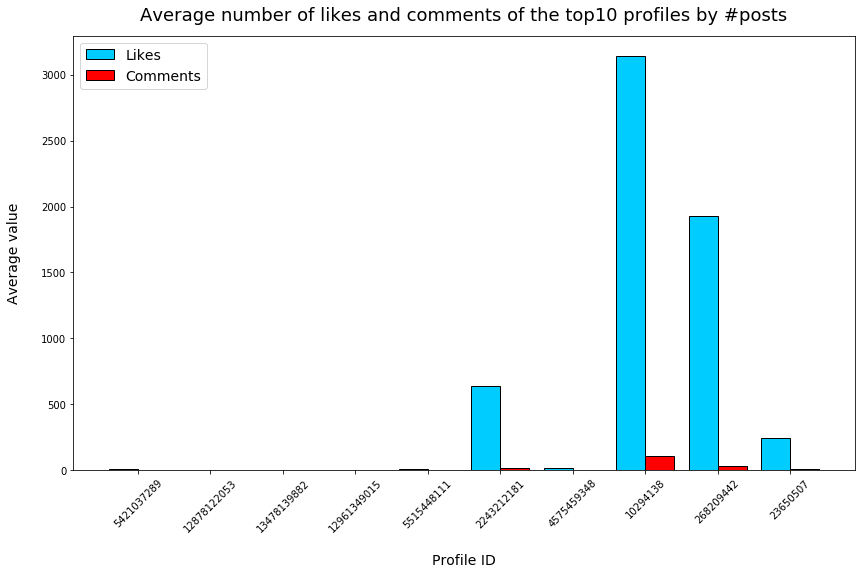

In [24]:
functions.plot_avg_stats_top10(posts)

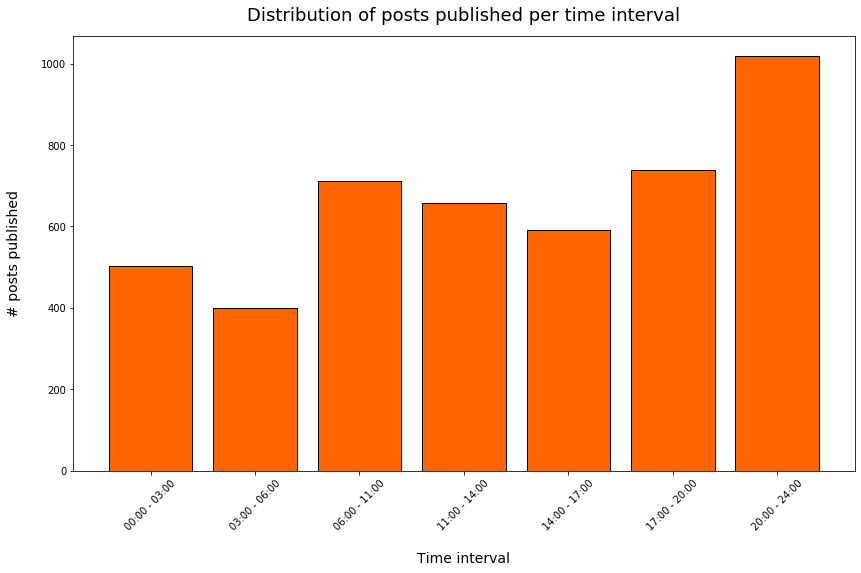

In [25]:
functions.plot_posts_top10(posts, time_intervals)

Although we are dealing with a *significantly smaller amount of posts*, the sample seems to be **representative** of the whole dataset in terms of posts publication times. In fact, the temporal distribution - according to the given time intervals - of the posts by the *top 10 profiles* **resembles** the one of *all the posts* in the complete dataset (plotted in **[RQ3]**)

## [RQ6]  *User posting effectiveness analysis*

# Bonus points

## [a] *Posts publishing frequency analysis*

In [5]:
posts_reader = functions.initialize_posts_reader()

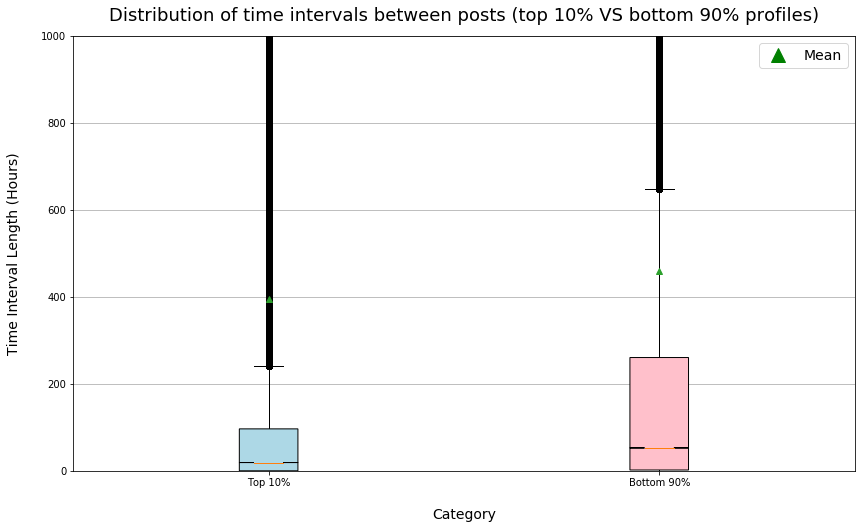

In [6]:
functions.plot_two_categories(profiles_df, posts_reader)

The box plots show that profiles in the *top 10%* by followers exhibit on average a **smaller time interval** between posts, i.e. they tend to publish posts with a higher frequency with respect to the rest of the profiles. It should however be noticed that, in order to perform a *quantitative assessment* of the frequency values, the *median* of the two distributions might provide a **much more reliable estimate**, being more robust and less sensitive to outliers. The *mean* for both the categories lies above the 3rd quartile of the distribution - with the *top 10%* one being even *above the upper whisker* (*Upper Whisker = Upper Quartile + 1.5 * Interquartile Range*) - meaning that  outliers cause the distributions to be **highly right-skewed**, while the two *medians*, although exhibiting the *same trend* in terms of publishing frequency, are significantly *smaller* in values.

# Algorithmic Questions

## [AQ2]

### Recursive algorithm

**Base Case:** $N <= 1$ &rarr;
*No cut can be performed*, hence the *maximum product* of sub-pieces is 0

**Recursive Case:** $N >= 2$ &rarr;
For each of the possible $N-1$ partitions into $2$ pieces of length $(i, N-i)$ for $1 <= i < N-1$, check whether the cut produces the *maximum product* or it is possible to obtain a larger result by *splitting recursively* the piece of length $N-i$, while leaving the piece of length $i$ untouched, then return the *maximum value*

In [4]:
def MaxProdRec(N):

    # Base case: no cut can be performed
    if N <= 1:
        return 0

    # Initialize result to 0
    result = 0

    # If N>=2, check for each possible partitions and store max product
    for i in range(1, N):
        result = max(result, max(i*(N-i), i*MaxProdRec(N-i)))

    # Return result
    return result

**Running-time complexity:** $O(2^N)$

### Dynamic Programming

**DP idea:** in order to avoid *recomputing subproblems solutions*, build a table of length $N+1$ ($0$ based indexing) in *bottom-up fashion*, storing in position $i$ the solution to the subproblem for input length $i$

**Implementation:** initialize the DP table $maxProdArr$ with $0$*s*. Fill $maxProdArr[i]$, for $1 <= i < N$,  following the same procedure as in the **Recursive algorithm**, but retrieving the solution to the subproblem for input length $N-i$ from $maxProdArr[N-i]$ (instead of calling the function again, in recursive fashion). The solution to the problem (for input length $N$) can be found in $maxProdArr[N]$

In [5]:
def MaxProdDP(N):

    # Initialize DP table
    maxProdArr = [0 for x in range(0, N+1)]

    # Fill DP table (maxProdArr[n]: solution of MaxProd(n))
    for n in range(1, N+1):
        result = 0
        for i in range(1, n):
            result = max(result, max(i*(n-i), i*maxProdArr[n-i]))
        maxProdArr[n] = result

    # Return result
    return maxProdArr[N]

**Running-time complexity:** $O(N^2)$

### Running Time Evaluation

In [6]:
input_sizes = [x for x in range(2,26)]

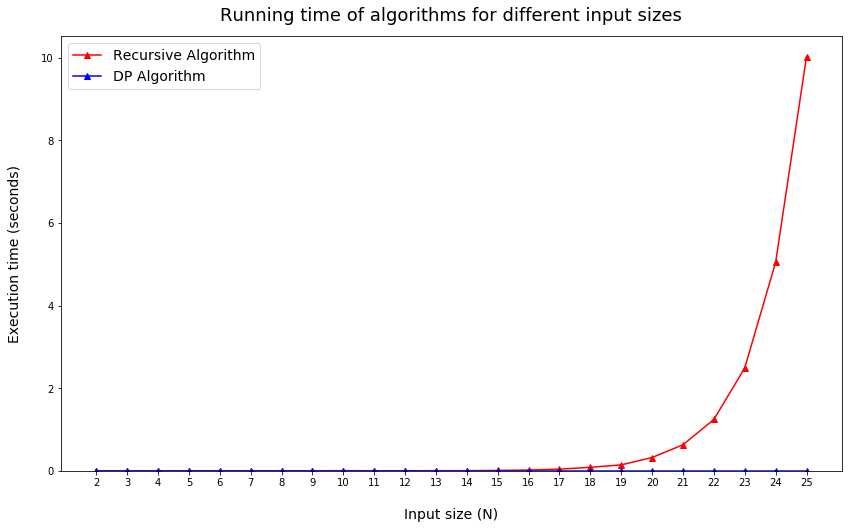

In [7]:
functions.plot_running_times([MaxProdRec, MaxProdDP], input_sizes)

The **exponential** shape of the execution time curve of the **recursive algorithm** is evident already at very small input sizes. In order to observe the **polynomial** shape *(degree = 2)* of the **dynamic programming** one, we increase the *number* of input sizes tested, as well as their *order of magnitude*.

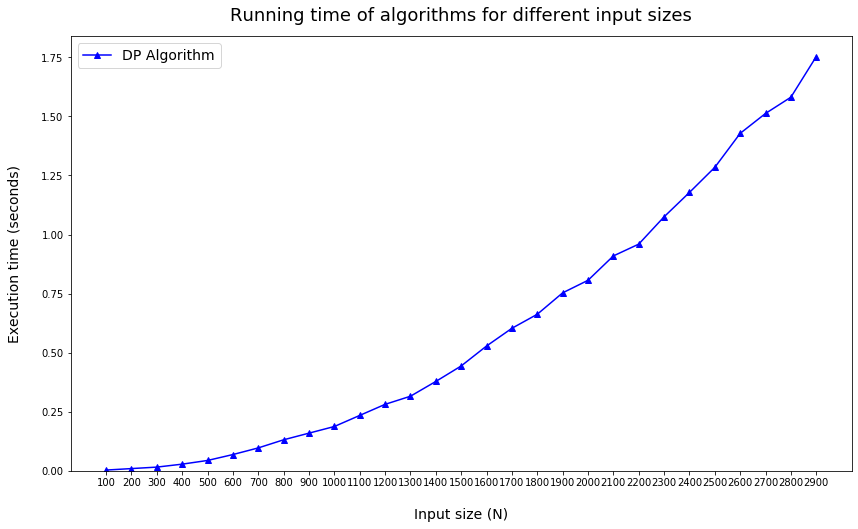

In [8]:
functions.plot_running_times([MaxProdDP], [x for x in range(100,3000,100)], "DP")

### Ad hoc algorithm

**Ad hoc idea:** the *max product solution* can be obtained by cutting the ribbon into the maximum number of subpieces of length $3$ allowing not to have any subpiece of length $1$; in fact, any number $K > 3$ can be split into $2$ *addends* $a + b = K$ having product $ab >= K$ *if and only if* $a,b >= 2$

**Proof:** $$ ab >= a+b \qquad a,b >0 $$ $$ ab-a-b >= 0 $$ $$ ab-a-b+1 >= 1 $$ $$ (a-1)(b-1) >= 1 \longrightarrow a,b >= 2 \longrightarrow K = a + b >= 4$$

**Implementation:**

* Handle specifically $N <= 3$ cases: $MaxProd = max(0, N-1)$ 
    * If $N <= 1$, *no cut can be performed*: $MaxProd = 0$
    * If $2 <= N <= 3$, the best option is cutting the ribbon into two pieces of lenght $1$ and $N-1$: $MaxProd = 1 \cdot (N-1) = N-1$


* When  $N > 3$:
    * Define $q$: *(maximum number of subpieces of length $3$ in ribbon of length $N$)* $-1$ $$ $$ $$ q = \lfloor(N-2)/3)\rfloor $$ <br/>
    * Define $r$: length of the *remaining piece* after cutting $q$ pieces of length $3$ $$ $$ $$ r = N - 3 \cdot q $$ <br/>
    * Compute the *product of the lenghts* of all the pieces: $$ MaxProd = 3^q \cdot r $$

In [9]:
def MaxProdLinear(N):

    if N <= 3:
        return max(0, N-1)

    q = (N-2)//3
    r = N - 3*q

    return pow(3, q)*r

**Running-time complexity:** $O(N)$

All intermediate operations can be performed in constant time $O(1)$; computing $ 3^ \left \lfloor \frac{N-2}{3} \right \rfloor $ requires a number of operations with grows **linearly** with respect to the input length $N$

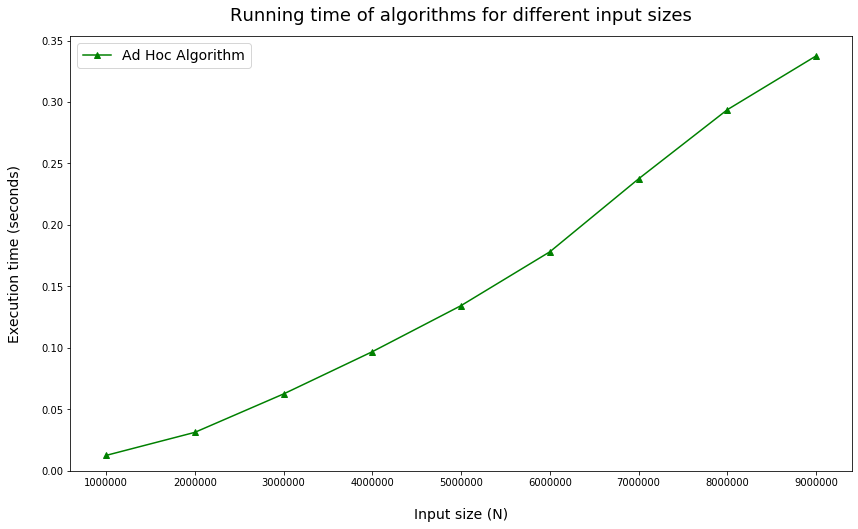

In [10]:
functions.plot_running_times([MaxProdLinear], [x for x in range(int(1e6),int(1e7),int(1e6))], "AH")